<h1>App</h1>

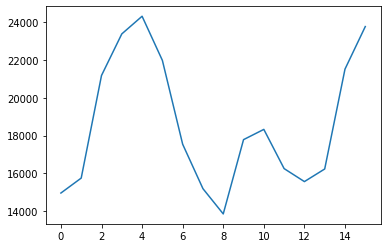

In [ ]:
from sklearn.metrics import mean_absolute_error
from fbprophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import streamlit as st
import asyncio
import nest_asyncio
asyncio.set_event_loop(asyncio.SelectorEventLoop())

class StreamlitApp:
  def __init__(self):
    self.filename = 'model.sav'
    self.model = joblib.load(self.filename)

  def train_model():
    path = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
    df = pd.read_csv(path,header=0)

    df.columns = ['ds','y']
    df['ds'] = pd.to_datetime(df['ds'])
    train = df.drop(df.index[-12:])

    model = Prophet()
    model.fit(train)
    filename = 'model.sav'
    joblib.dump(model,filename)


  def predict_sales(self):
    future = list()
    n=int(st.slider('Months:',1,36,16))
    count = 0
    y,m = divmod(n,12)
    for i in range(0,y+1):
        if m>=0:
          for j in range(1,13):
            if count<n :
              date = str(1969+i)+'-'+str("%02d"%j)
              count+=1
              future.append([date])
    future = pd.DataFrame(future)
    future.columns = ['ds']
    future['ds'] = pd.to_datetime(future['ds'])
        
    forecast = self.model.predict(future)
    y_pred = forecast['yhat'].values
    fig, ax = plt.subplots()
    ax.plot(y_pred, label='Predicted')


sa =StreamlitApp()
sa.predict_sales()